# Getting Started with AnyPyTools

For installation instructions, see [this page](00_Install_and_setup.ipynb)

Tutorial:
- [Running a simple macro](#Running-a-simple-macro)
- [Running multiple macros](#Running-multiple-macros)
- [Prallel execution](#Prallel-execution)
- [Getting data from the AnyBody Model](#Getting-data-from-the-AnyBody-Model)

## Running a simple macro

In this and the following tutorials we will use an extremly simple model of a knee joint with one quadriceps muscle included ( see the figure)
<img src="https://dl.dropboxusercontent.com/u/1683635/store/knee.gif" alt="Drawing" align="Right" 
style="height: 120px;"/>

The model is defined in the file [`Knee.any`](knee.any), which must be placed in the current working directory.

Now, let us see how to run this simple model from python. The first step is to import the appropriate class for working with the AMS console application and create an instance of the class ``AnyPyProcess``.

In [13]:
from anypytools.abcutils import AnyPyProcess 
app = AnyPyProcess()

Now we define an _AnyScript_ macro which we want to run on the model. The macro is executed by starting the `start_macro` method of the `AnyPyProcess` class

In [14]:
macrolist = [['load "Knee.any"',
              'operation Main.MyStudy.Kinematics',
              'run',
              'exit']]

app.start_macro(macrolist);

[****************100%******************]  1 of 1 complete

## Running multiple macros

It is easy to run multiple macros by adding an extra set of macro commands to the macro list

In [15]:
macrolist = [['load "Knee.any"',
              'operation Main.MyStudy.Kinematics',
              'run',
              'exit'],
             ['load "Knee.any"',
              'operation Main.MyStudy.InverseDynamics',
              'run',
              'exit']]
app.start_macro(macrolist);

[****************100%******************]  2 of 2 complete

## Parallel execution

Notice, that AnyPyProcess will run the anyscript macros in parallel. Modern computers have multiple cores, but a single AnyBody instance can only utilize a single core, leaving us with a great potential for speeding things up through penalization.

To test this, let us create 10 macros in a for-loop. 

In [16]:
macrolist = []
for i in range(40):
    macrolist.append(['load "Knee.any"',              
                      'operation Main.MyStudy.InverseDynamics',
                      'run',
                      'exit'] )

AnyPyProcess has a parameter 'num_processes' that controls the number parallel processes. Let us try a small example to see the difference in speed:

In [17]:
# First sequentially
app = AnyPyProcess(num_processes = 1)
app.start_macro(macrolist);

[****************100%******************]  40 of 40 complete

In [18]:
#Then with parallization
app = AnyPyProcess(num_processes = 10)
app.start_macro(macrolist);

[****************100%******************]  40 of 40 complete

## Getting data from the AnyBody Model

If we are only interested in a few variables then
In the following macro we have added a new classoperation to 'Dump' the result of the maximum muscle activity. The `start_macro` method will return all the 'dump'ed variables:


In [19]:
macrolist = [['load "Knee.any"',
              'operation Main.MyStudy.InverseDynamics',
              'run',
              'classoperation Main.MyStudy.Output.MaxMuscleActivity "Dump"',
              'exit']] 

results = app.start_macro(macrolist)
results

[****************100%******************]  1 of 1 complete

[{'Main.MyStudy.Output.MaxMuscleActivity': 
    array([ 0.00890538,  0.00927552,  0.00986515,  0.01067729,  0.01171374,
            0.01297502,  0.01446022,  0.0161669 ,  0.01809102,  0.02022675,
            0.02256637,  0.02510015,  0.0278161 ,  0.03069982,  0.03373426,
            0.0368995 ,  0.0401725 ,  0.04352691,  0.04693299,  0.05035756,
            0.05376422,  0.05711384,  0.06036528,  0.06347664,  0.06640681,
            0.0691175 ,  0.07157552,  0.07375524,  0.07564093,  0.07722862,
            0.07852727,  0.0795589 ,  0.08035747,  0.08096676,  0.0814373 ,
            0.08182288,  0.0821771 ,  0.08255065,  0.08298457,  0.08333915,
            0.08355467,  0.08365939,  0.08367977,  0.08364023,  0.08356287,
            0.08346721,  0.08336996,  0.08328478,  0.08322211,  0.083189  ,
            0.083189  ,  0.08322211,  0.08328478,  0.08336996,  0.08346721,
            0.08356287,  0.08364023,  0.08367977,  0.08365939,  0.08355467,
            0.08333915,  0.08298458,  0.0825

In order to make the plot we import the matplotlib library, and enable inline figurs 

In [20]:
max_muscle_act = results[0]['Main.MyStudy.Output.MaxMuscleActivity']

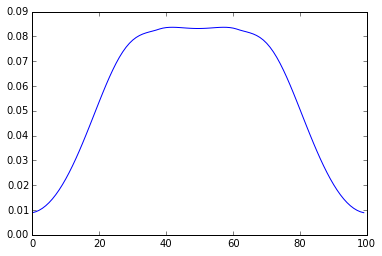

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

plt.plot(max_muscle_act );